In [1]:
import datetime
import warnings

import jax
import jax.numpy as jnp
from get_model import get_model_and_data  # noqa: F401
from main import run_simple_lmc_numpyro  # noqa: F401
from numpyro.infer import MCMC, NUTS, Predictive  # noqa: F401
from progressive_eval import run_progressive_logreg


%env JAX_PLATFORM_NAME=cuda
warnings.simplefilter("ignore", FutureWarning)

jnp.set_printoptions(precision=3, suppress=True)
jax.config.update("jax_enable_x64", True)
print(jax.devices("cuda"))

names = [
    "banana",
    "breast_cancer",
    "diabetis",
    "flare_solar",
    "german",
    "heart",
    "image",
    "ringnorm",
    "splice",
    "thyroid",
    "titanic",
    "twonorm",
    "waveform",
]

env: JAX_PLATFORM_NAME=cuda
[CudaDevice(id=0)]


==================== banana ====================
Data shape: (5300, 2)
GT energy bias: 1.163e-05, test acc: 0.5481, test acc top 90%: 0.5548


100.00%|██████████| [00:18<00:00,  5.41%/s]


QUICSORT best acc: 0.551, best acc top 90%: 0.557, best energy: 1.593e-05, best w2: 3.858e-04


100.00%|██████████| [00:31<00:00,  3.17%/s]


Euler best acc: 0.5128, best acc top 90%: 0.5236, best energy: 6.961e+00, best w2: 9.163e+01


sample: 100%|██████████| 44/44 [02:08<00:00,  2.92s/it]


NUTS best acc: 0.5483, best acc top 90%: 0.5562, best energy: 5.433e-04, best w2: 2.108e-01

==================== breast_cancer ====================
Data shape: (263, 9)
GT energy bias: 1.334e-04, test acc: 0.6618, test acc top 90%: 0.6674


100.00%|██████████| [00:17<00:00,  5.61%/s]


QUICSORT best acc: 0.6643, best acc top 90%: 0.6701, best energy: 7.725e-05, best w2: 1.785e-01


100.00%|██████████| [00:40<00:00,  2.49%/s]


Euler best acc: 0.6547, best acc top 90%: 0.6626, best energy: 2.288e-01, best w2: 1.051e+00


sample: 100%|██████████| 44/44 [00:39<00:00,  1.11it/s]


NUTS best acc: 0.663, best acc top 90%: 0.6693, best energy: 2.883e-02, best w2: 1.478e+01

==================== diabetis ====================
Data shape: (768, 8)


sample: 100%|██████████| 9216/9216 [00:24<00:00, 379.00it/s]


GT energy bias: 3.029e-05, test acc: 0.7762, test acc top 90%: 0.7787


100.00%|██████████| [00:23<00:00,  4.27%/s]


QUICSORT best acc: 0.7777, best acc top 90%: 0.7803, best energy: 3.291e-05, best w2: 4.835e-02


100.00%|██████████| [00:46<00:00,  2.15%/s]


Euler best acc: 0.7285, best acc top 90%: 0.7438, best energy: 4.191e+00, best w2: 2.675e+01


sample: 100%|██████████| 44/44 [01:10<00:00,  1.59s/it]


NUTS best acc: 0.7696, best acc top 90%: 0.7757, best energy: 1.660e-01, best w2: 1.342e+01

==================== flare_solar ====================
Data shape: (144, 9)


sample: 100%|██████████| 9216/9216 [10:06<00:00, 15.19it/s]


GT energy bias: 1.739e-03, test acc: 0.617, test acc top 90%: 0.6247


100.00%|██████████| [00:15<00:00,  6.65%/s]


QUICSORT best acc: 0.6171, best acc top 90%: 0.6257, best energy: 1.528e+01, best w2: 3.114e+03


100.00%|██████████| [00:36<00:00,  2.71%/s]


KeyboardInterrupt: 

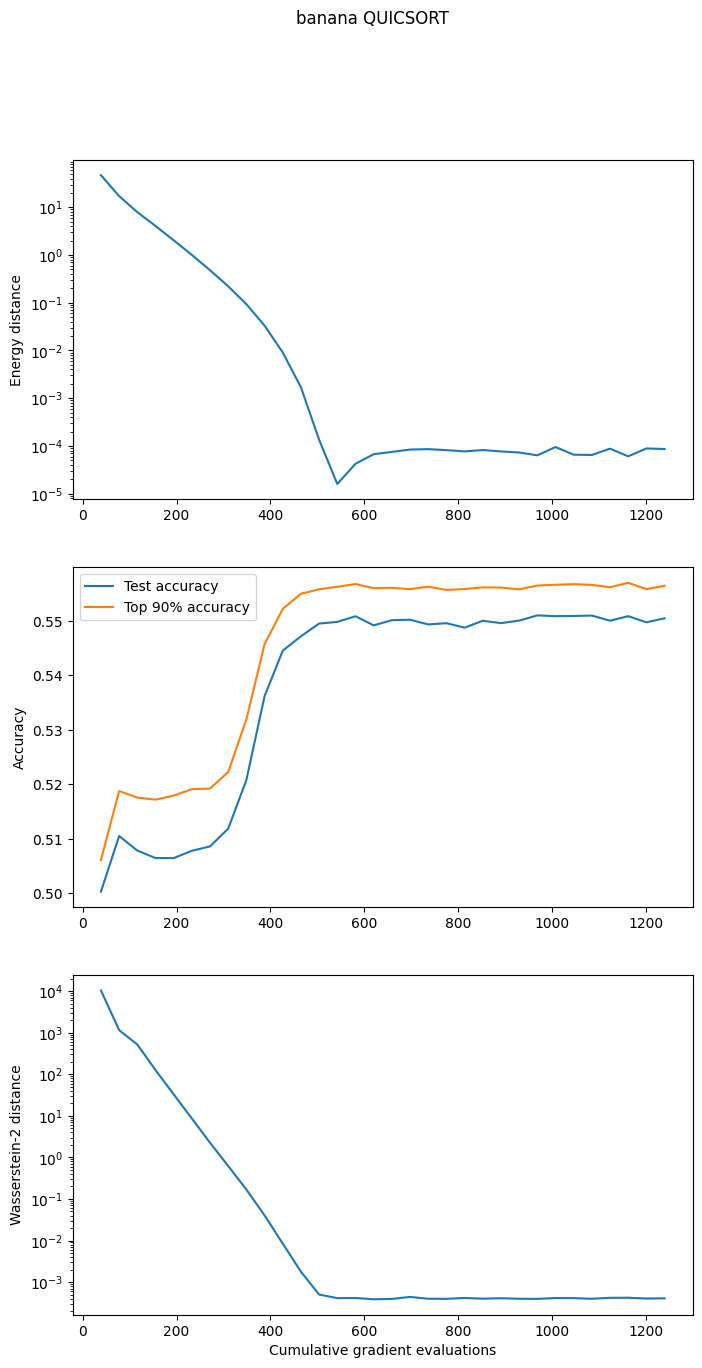

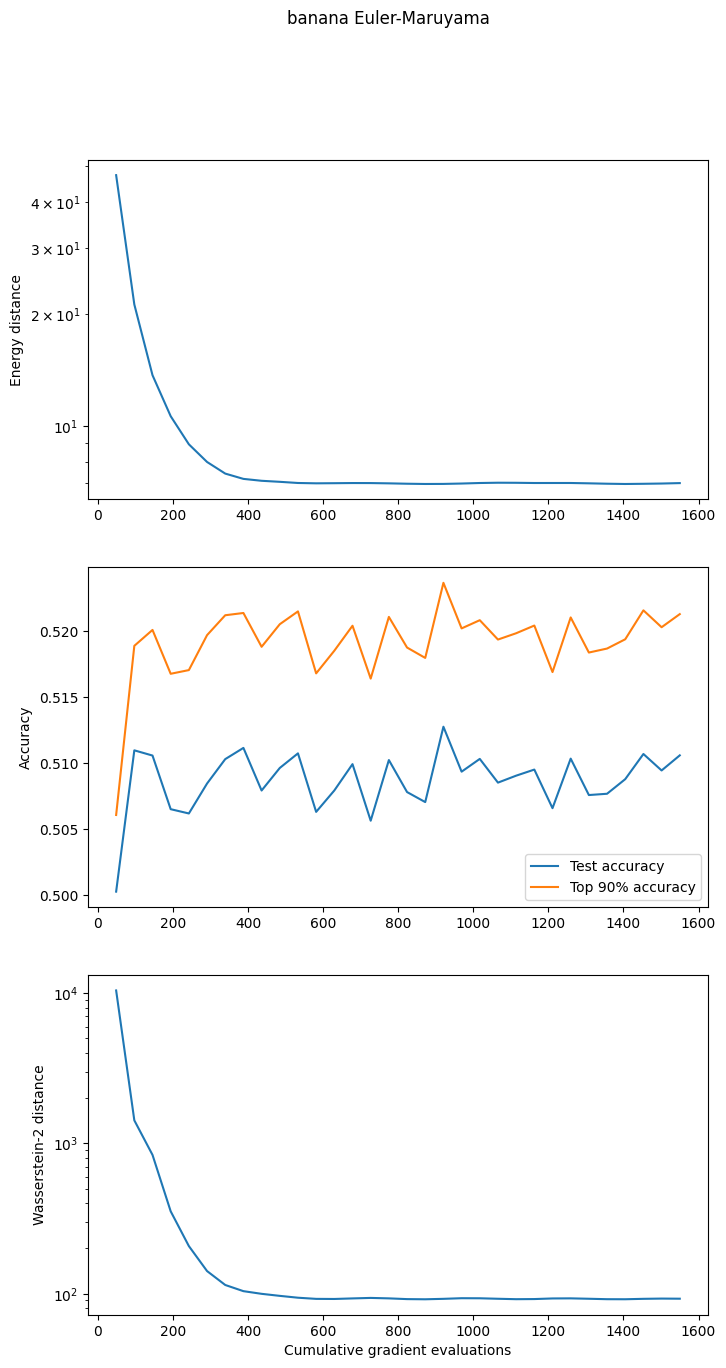

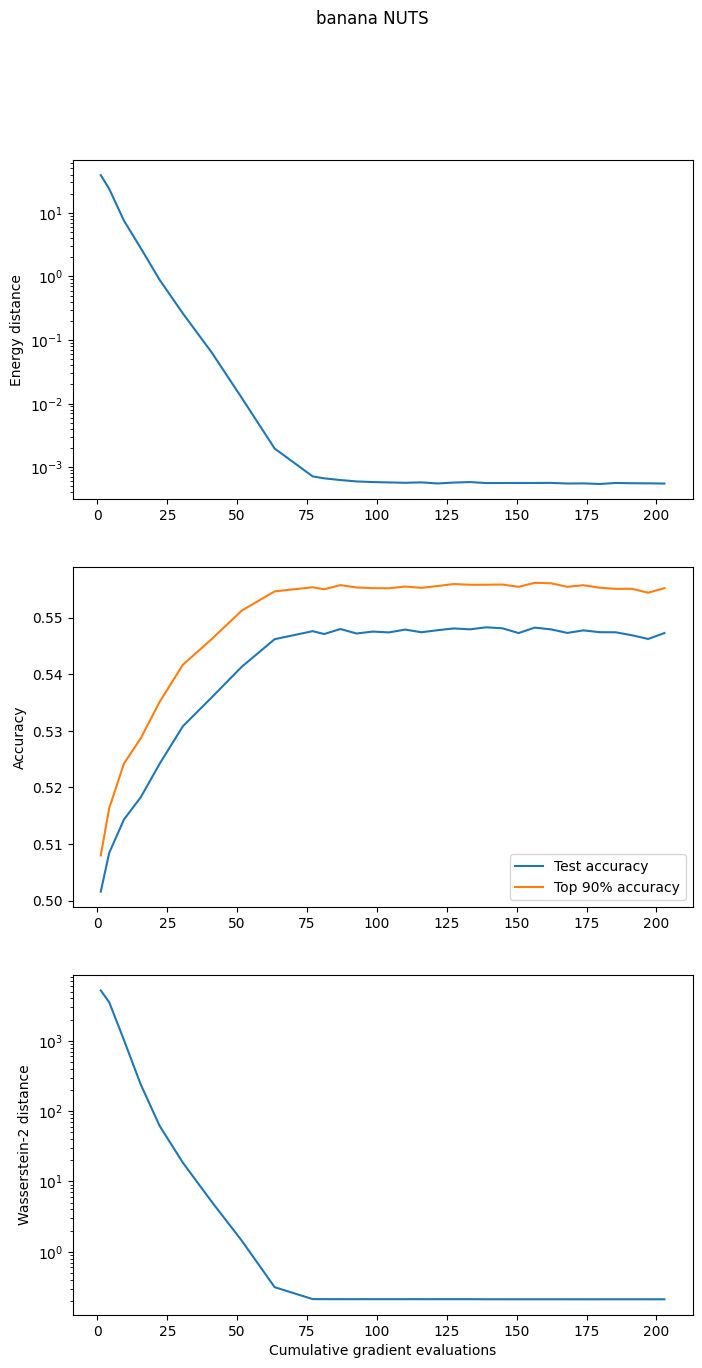

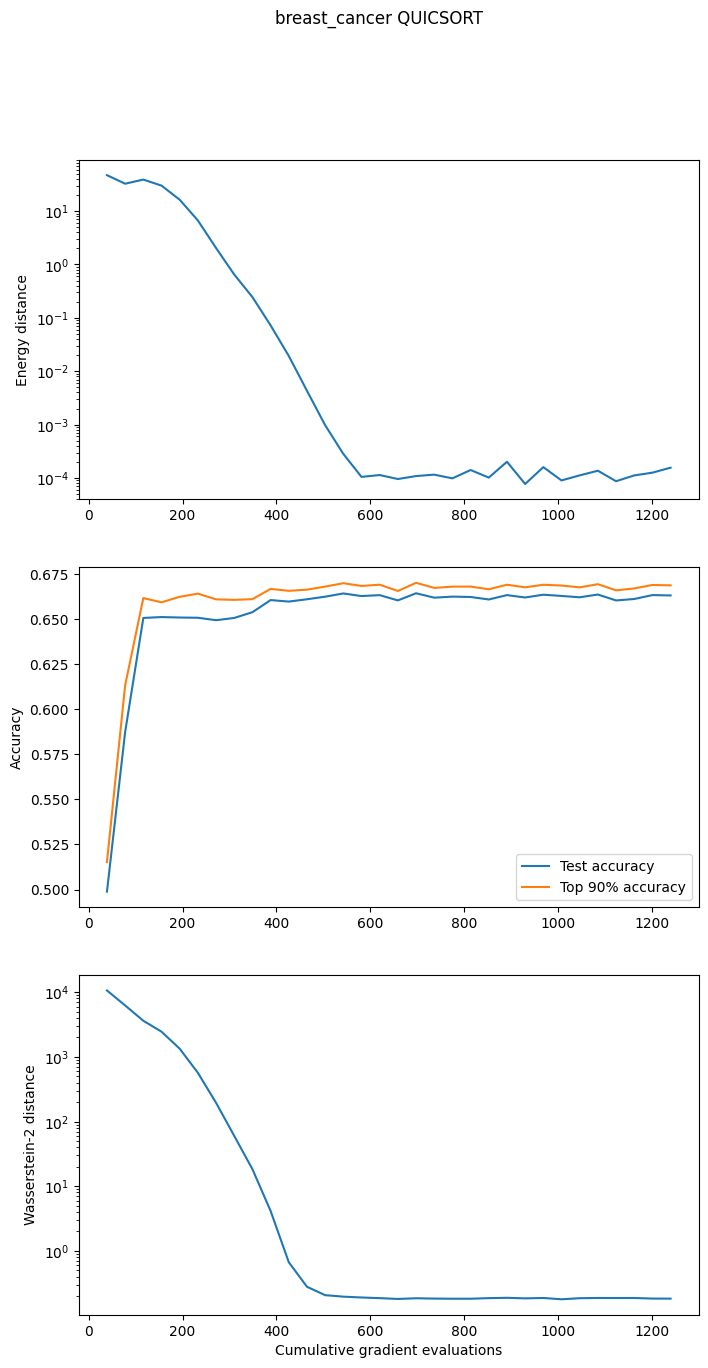

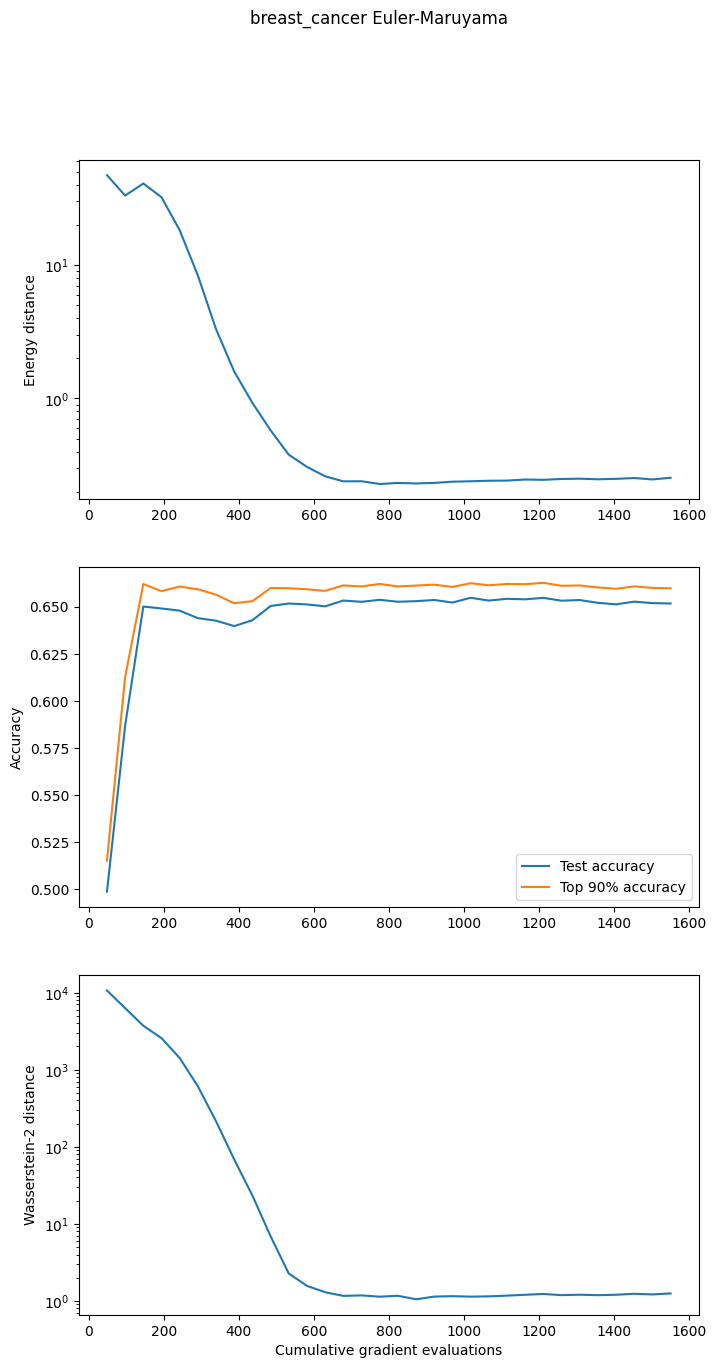

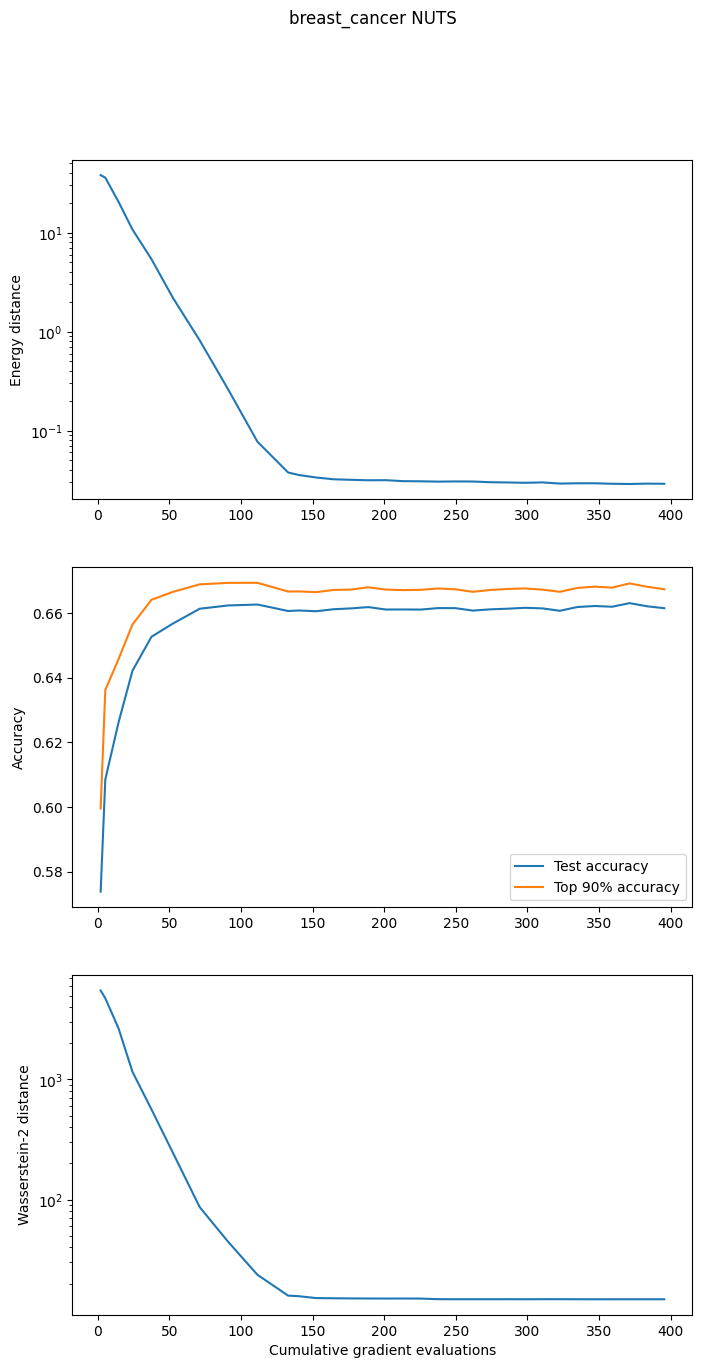

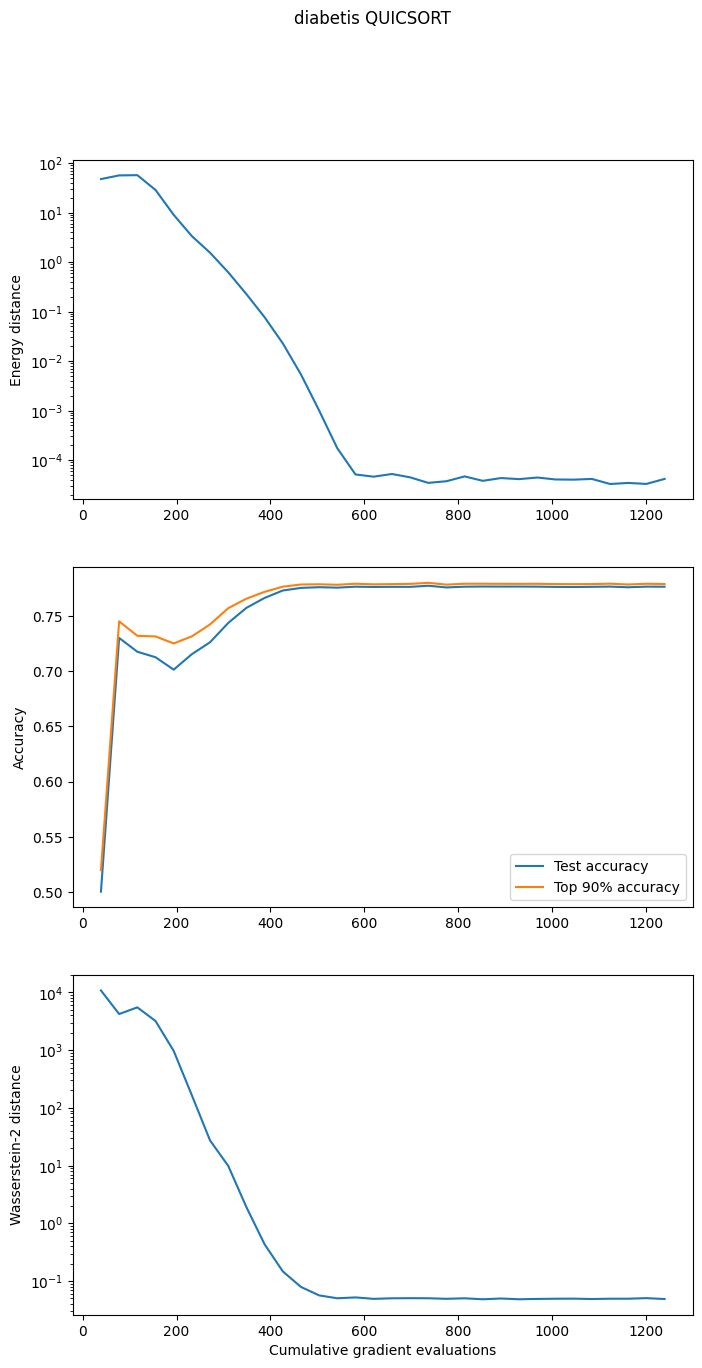

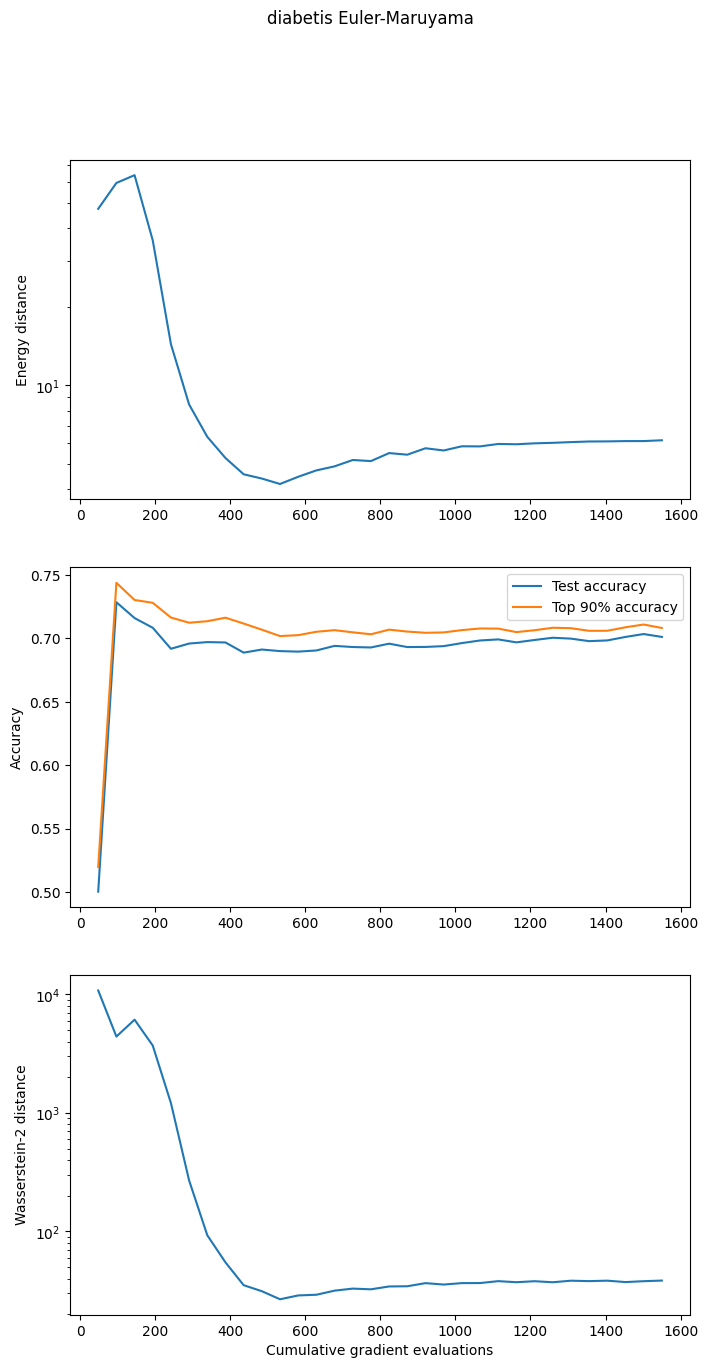

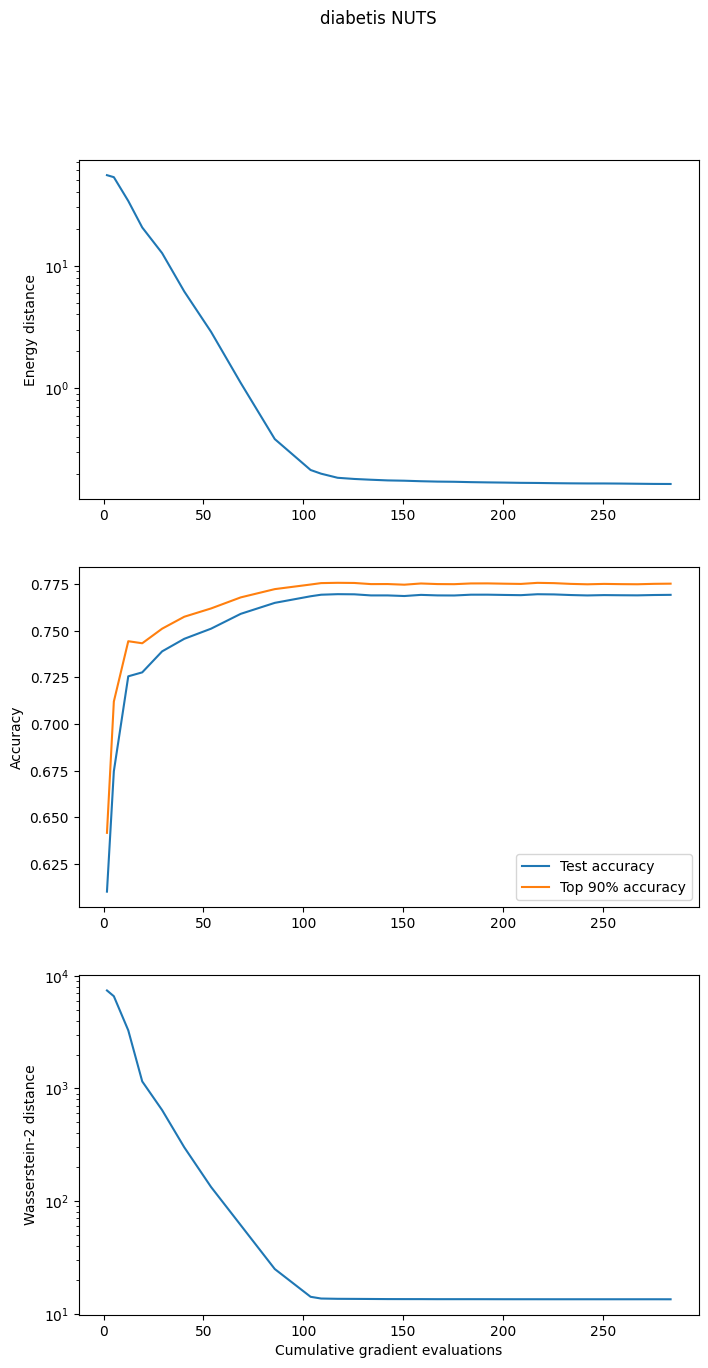

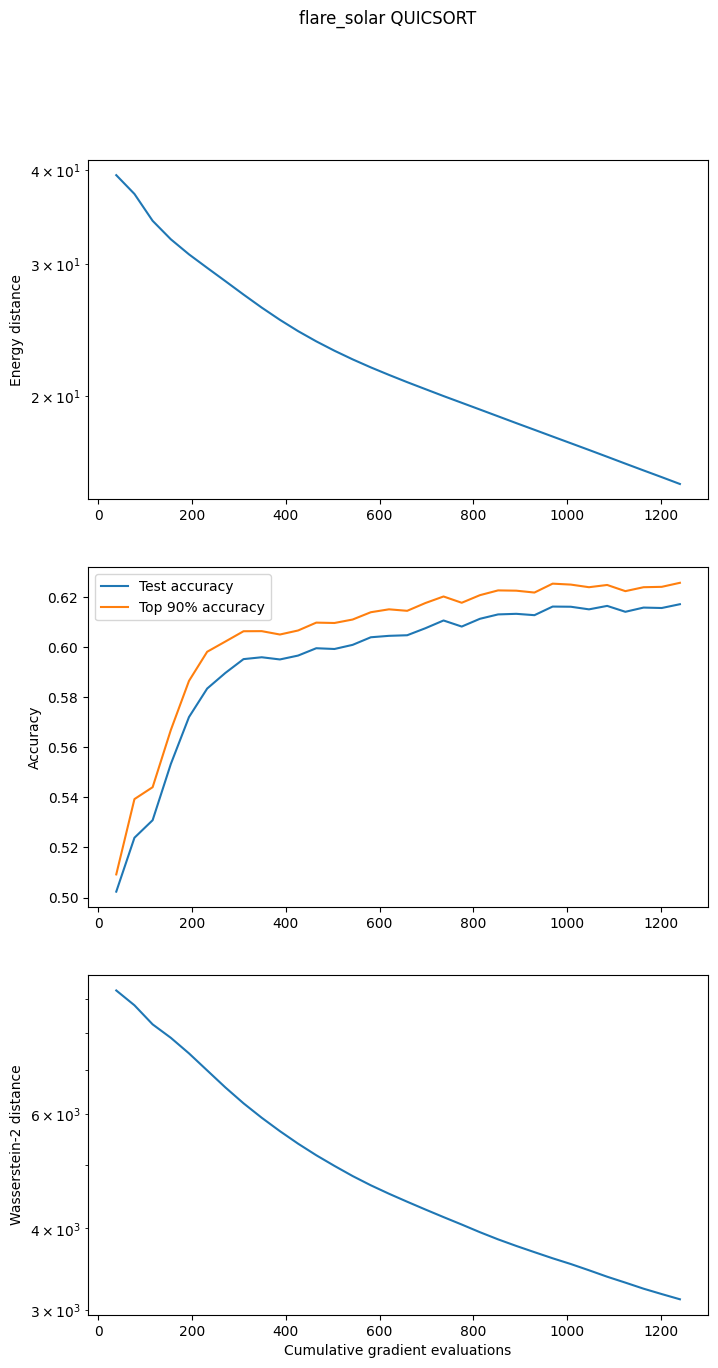

In [2]:
timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
log_filename = f"progressive_results/log_{timestamp}.txt"
with open(log_filename, "w") as f:
    f.write(f"Results for time {timestamp}\n\n")

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
for name in names:
    print(f"==================== {name} ====================")
    run_progressive_logreg(name, log_filename)
    print()